# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zaragoza
Processing Record 2 of Set 1 | fale old settlement
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | sovetskiy
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | hamilton
Processing Record 8 of Set 1 | anadyr
Processing Record 9 of Set 1 | inarajan village
Processing Record 10 of Set 1 | cuyo
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | acapulco de juarez
Processing Record 17 of Set 1 | dryden
Processing Record 18 of Set 1 | kone
Processing Record 19 of Set 1 | bayside
Processing Record 20 of Set 1 | wailua homesteads
Processing Record 21 of Set 1 | okhotsk
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,zaragoza,41.6561,-0.8773,64.49,57,75,4.61,ES,1711677942
1,fale old settlement,-9.3852,-171.2468,85.84,74,46,15.03,TK,1711677942
2,port-aux-francais,-49.3500,70.2167,40.84,75,98,8.21,TF,1711677942
3,sovetskiy,61.3614,63.5842,12.29,92,100,10.22,RU,1711677942
4,adamstown,-25.0660,-130.1015,76.19,74,39,18.28,PN,1711677942


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zaragoza,41.6561,-0.8773,64.49,57,75,4.61,ES,1711677942
1,fale old settlement,-9.3852,-171.2468,85.84,74,46,15.03,TK,1711677942
2,port-aux-francais,-49.3500,70.2167,40.84,75,98,8.21,TF,1711677942
3,sovetskiy,61.3614,63.5842,12.29,92,100,10.22,RU,1711677942
4,adamstown,-25.0660,-130.1015,76.19,74,39,18.28,PN,1711677942


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

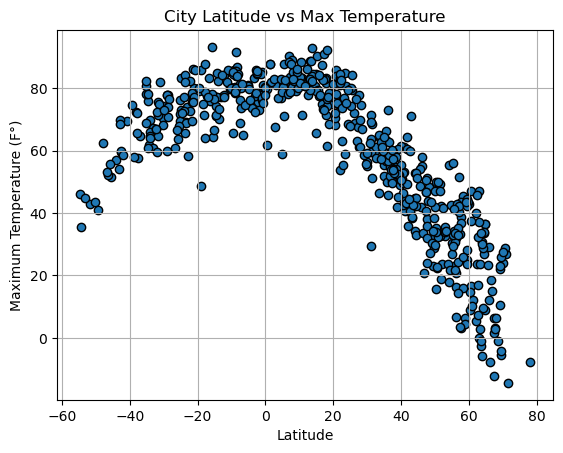

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], linewidth=1, edgecolor="black", marker="o", label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F°)")
plt.title("City Latitude vs Max Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

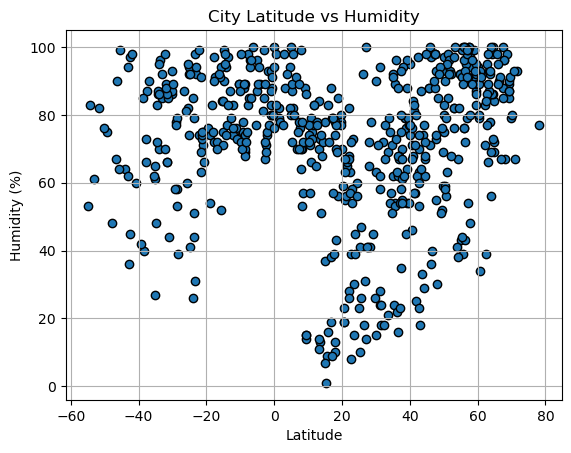

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], linewidth=1, edgecolor="black", marker="o", label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

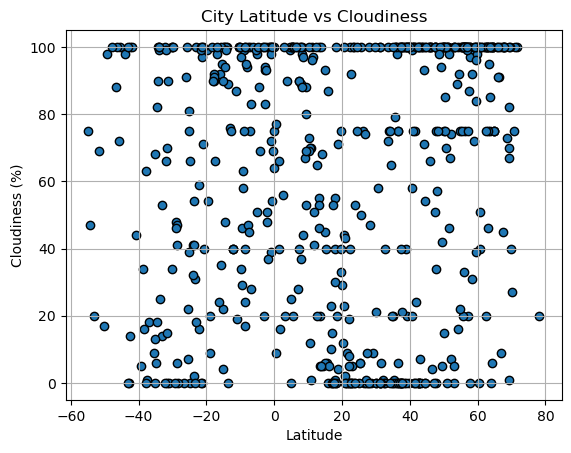

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], linewidth=1, edgecolor="black", marker="o", label="Cities")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

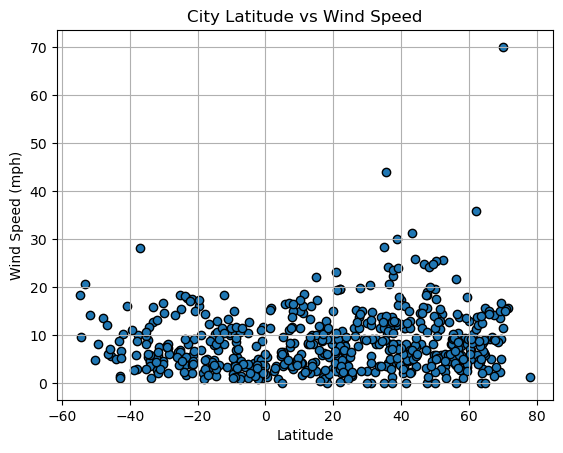

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], linewidth=1, edgecolor="black", marker="o", label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, annotate_pos):
    (slope, intercept, rvalue, _, _) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    return rvalue

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zaragoza,41.6561,-0.8773,64.49,57,75,4.61,ES,1711677942
3,sovetskiy,61.3614,63.5842,12.29,92,100,10.22,RU,1711677942
5,hamilton,39.1834,-84.5333,50.97,54,20,8.05,US,1711677943
6,anadyr,64.7500,177.4833,9.10,84,75,15.66,RU,1711677876
7,inarajan village,13.2736,144.7484,88.77,84,55,13.38,GU,1711677943


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,fale old settlement,-9.3852,-171.2468,85.84,74,46,15.03,TK,1711677942
2,port-aux-francais,-49.3500,70.2167,40.84,75,98,8.21,TF,1711677942
4,adamstown,-25.0660,-130.1015,76.19,74,39,18.28,PN,1711677942
10,east london,-33.0153,27.9116,67.17,85,14,12.62,ZA,1711677944
11,grytviken,-54.2811,-36.5092,35.40,83,47,9.66,GS,1711677944


###  Temperature vs. Latitude Linear Regression Plot

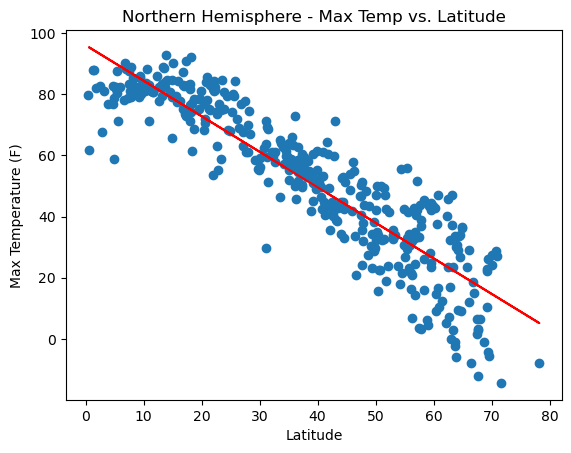

The r-value is: -0.9057105129116106


In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
r_value_northern_max_temp = plot_linear_regression(x_values, y_values, 
                                 'Latitude', 'Max Temperature (F)', 
                                 'Northern Hemisphere - Max Temp vs. Latitude', 
                                 (0, 0))
print(f"The r-value is: {r_value_northern_max_temp}")


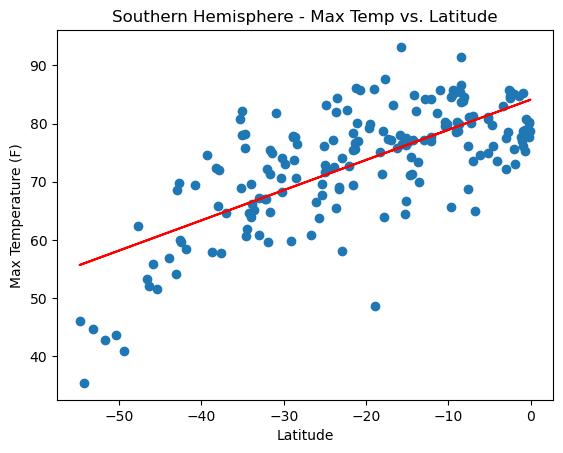

The r-value is: 0.7084489442568525


In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
r_value_southern_max_temp = plot_linear_regression(x_values, y_values, 
                                 'Latitude', 'Max Temperature (F)', 
                                 'Southern Hemisphere - Max Temp vs. Latitude', 
                                 (-30, 50))
print(f"The r-value is: {r_value_southern_max_temp}")

**Discussion about the linear relationship:** 

In the northern hemisphere, there is a strong negative correlation between max temp and latitude, meaning the further north you go the max temperate will steadily drop as a result.

In the southern hemisphere, there is strong positive correlation. This means that as you get closer to the equator, the max temperature will rise as a result.

### Humidity vs. Latitude Linear Regression Plot

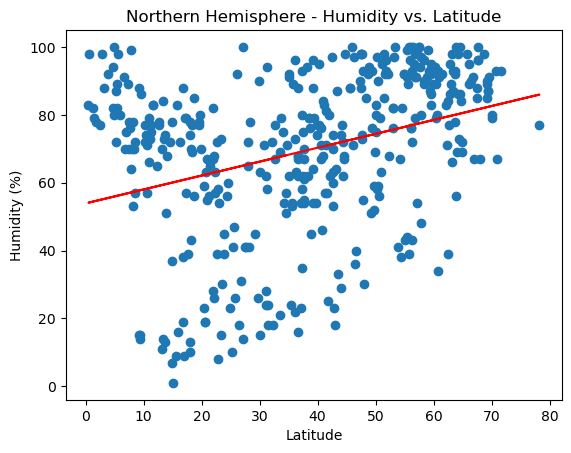

The r-value is: 0.3301537138081395


In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
r_value_northern_humidity = plot_linear_regression(x_values, y_values, 
                                 'Latitude', 'Humidity (%)', 
                                 'Northern Hemisphere - Humidity vs. Latitude', 
                                 (0, 0))
print(f"The r-value is: {r_value_northern_humidity}")

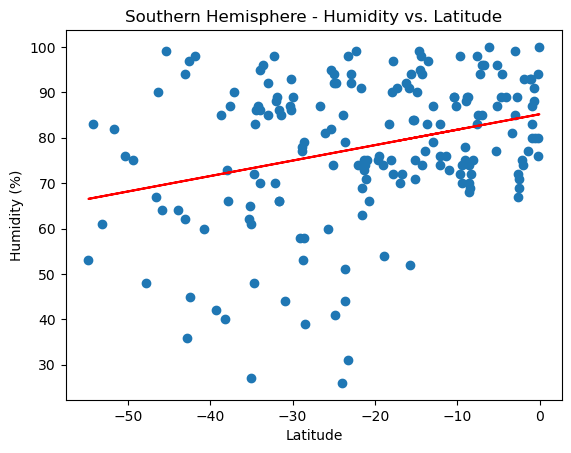

The r-value is: 0.3018779960441665


In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
r_value_southern_humidity = plot_linear_regression(x_values, y_values, 
                                 'Latitude', 'Humidity (%)', 
                                 'Southern Hemisphere - Humidity vs. Latitude', 
                                 (0, 0))
print(f"The r-value is: {r_value_southern_humidity}")

**Discussion about the linear relationship:** 

In both hemispheres, there is a slight positive correlation between humidity and latitutude.

In the northern hemisphere, humditiy will slightly increase as you get furhter north. In the south, the same effect occurs at a slightly stronger correlation as you get closer to the equator.

### Cloudiness vs. Latitude Linear Regression Plot

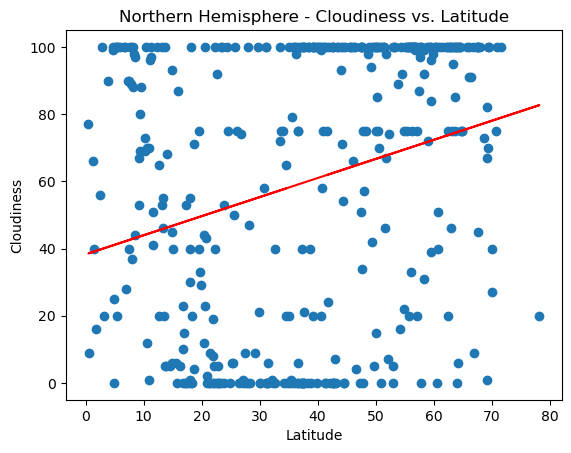

The r-value is: 0.26888165718059615


In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
r_value_northern_cloudiness = plot_linear_regression(x_values, y_values, 
                                 'Latitude', 'Cloudiness', 
                                 'Northern Hemisphere - Cloudiness vs. Latitude', 
                                 (0, 0))
print(f"The r-value is: {r_value_northern_cloudiness}")

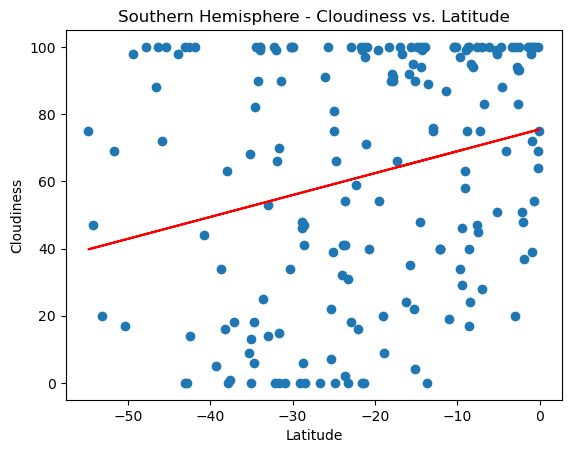

The r-value is: 0.25066269725961104


In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
r_value_southern_cloudiness = plot_linear_regression(x_values, y_values, 
                                 'Latitude', 'Cloudiness', 
                                 'Southern Hemisphere - Cloudiness vs. Latitude', 
                                 (0, 0))
print(f"The r-value is: {r_value_southern_cloudiness}")

**Discussion about the linear relationship:** 

In both hemispheres, cloudiness does not appear to be strongly correlated with cloudiness. Both have r-values low enough to conclude they are not strongly correlated.

### Wind Speed vs. Latitude Linear Regression Plot

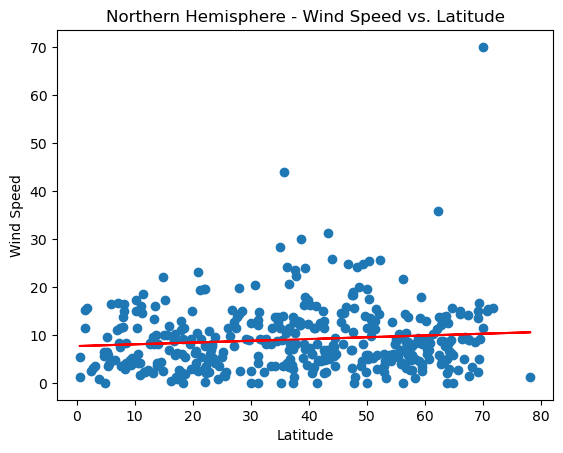

The r-value is: 0.1020402980561861


In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
r_value_northern_wind_speed = plot_linear_regression(x_values, y_values, 
                                 'Latitude', 'Wind Speed', 
                                 'Northern Hemisphere - Wind Speed vs. Latitude', 
                                 (0, 0))
print(f"The r-value is: {r_value_northern_wind_speed}")

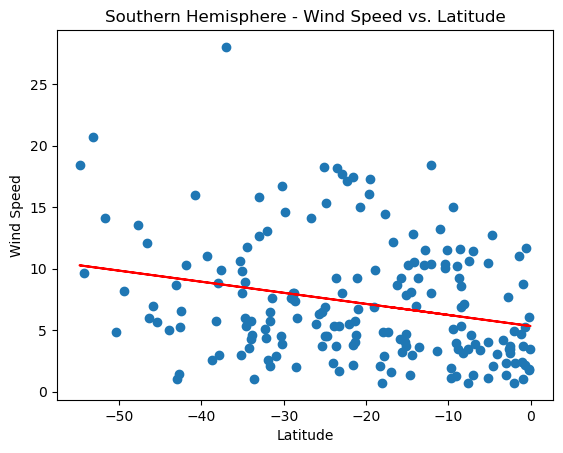

The r-value is: -0.2585753030394049


In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
r_value_southern_wind_speed = plot_linear_regression(x_values, y_values, 
                                 'Latitude', 'Wind Speed', 
                                 'Southern Hemisphere - Wind Speed vs. Latitude', 
                                 (0, 0))
print(f"The r-value is: {r_value_southern_wind_speed}")

**Discussion about the linear relationship:**

This correlation shows that as you get closer to the equator, wind speed can be somewhat expected to fall slightly. Ads you go futher north, there does not appear to be a strong correlation with wind speed and latitude.